# 7.6

In [0]:
import numpy as np
# from scipy.stats import zipf, poisson
from matplotlib import pyplot as plt
from scipy.integrate import quad

## 7.25

Using your code from Exercise 7.22, with a target proportional to $f(x) = 4e^{-\frac{(x+3)^2}{4}}+6e^{-\frac{(x-5)^2}{32}}$ with normal proposal and $\sigma^2 = 1$:

i.) Using a starting point of $x_0 = -30$, run your sampler for $10^5$ steps. For each $k \in \{1,2,...,5 \}$ plot a normed histogram of the first $10^k$ samples and also plot $\frac{f}{Z}$

In [0]:
def metropolis_hastings_normal(f,sig,x_0,num_samples):
  """ Perfoms Metropolis-Hastings algorithm 
  to generate num_samples samples from the p.d.f. proportional to f(x) """
  y = np.empty(num_samples)
  y[0] = x_0
  t = 0
  while t < num_samples - 1:
    proposal = np.random.randn(1) * sig + y[t]
    accept_prob = min( f(proposal) / f(y[t]), 1 )
    if np.random.rand(1)[0] <= accept_prob:
      y[t+1] = proposal
    else:
      y[t+1] = y[t]
    
    t += 1
  
  return y

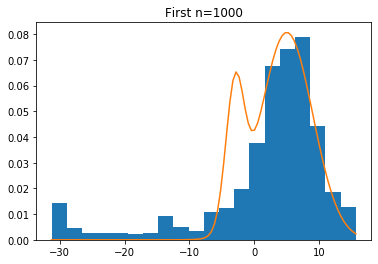

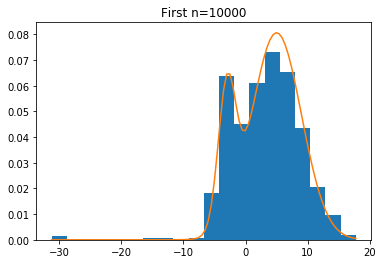

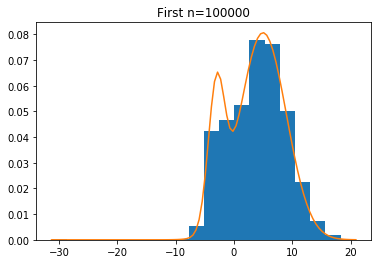

In [0]:
# Define f
f = lambda x : 4 * np.exp(-(x+3)**2 / 4) + 6 * np.exp(-(x-5)**2 / 32)

# Calculate Z, the normalizing factor
Z = quad(f,-np.inf,np.inf)[0]

samples = metropolis_hastings_normal(f, 1, -30, 10**5)

for k in [1,2,3,4,5]:
  s = samples[:10**k]
  plt.hist(samples[:10**k],bins=20,density=True)
  d = np.linspace(min(s),max(s),100)
  plt.plot(d,f(d)/Z)
  plt.title("First n={}".format(10**k))
  plt.show()

ii.) Change your starting point to $x_0 = 50$ and do the same

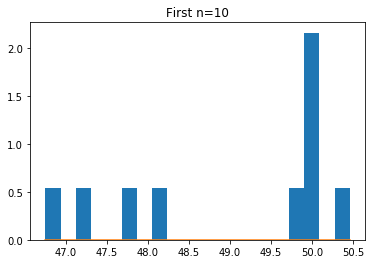

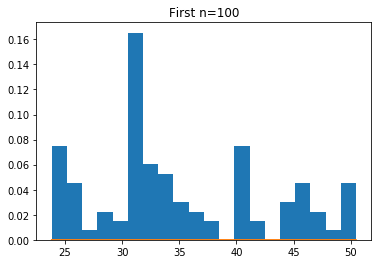

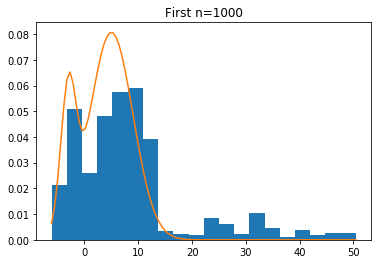

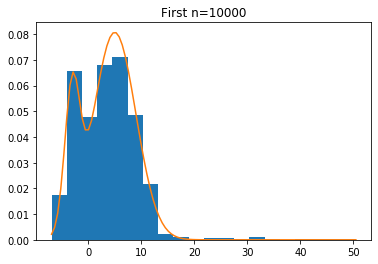

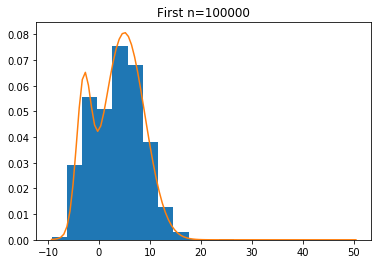

In [0]:
samples = metropolis_hastings_normal(f, 1, 50, 10**5)

for k in [1,2,3,4,5]:
  s = samples[:10**k]
  plt.hist(samples[:10**k],bins=20,density=True)
  d = np.linspace(min(s),max(s),100)
  plt.plot(d,f(d)/Z)
  plt.title("First n={}".format(10**k))
  plt.show()

iii.) Use all these results and plots to determine a good value for $B$ for the burn in, independent of an initial value in $[-30,50]$. Justify your choice.

In both cases, it appears that both sides seem to have reached the bulk of the distribution by B = 1000, so I would feel comfortable using that as a sufficient burn-in length.

## 7.26

Adjust your code to accept a number B of burn-in steps to run before collecting N samples. Apply your code to the new f(x) defined below. Run your sampler on $B = 10^5, N = 10^5$ for each starting point $x\in \{-10,...10\}$. Plot a histogram of the results of each run, and on the same graph plot $\frac{f}{Z}$.


In [0]:
def metropolis_hastings_normal(f,sig,x_0,B,N):
  """ Perfoms Metropolis-Hastings algorithm 
  to generate num_samples samples from the p.d.f. proportional to f(x) """
  y = np.empty(N + B)
  y[0] = x_0
  t = 0
  while t < N + B - 1:
    proposal = np.random.randn(1) * sig + y[t]
    accept_prob = min( f(proposal) / f(y[t]), 1 )
    if np.random.rand(1)[0] <= accept_prob:
      y[t+1] = proposal
    else:
      y[t+1] = y[t]
    
    t += 1
  
  return y[-N:]

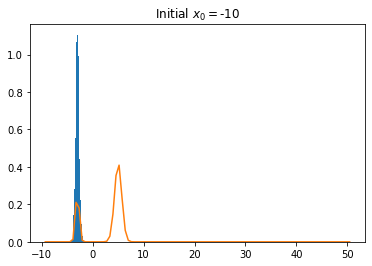

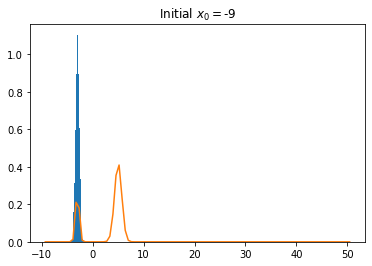

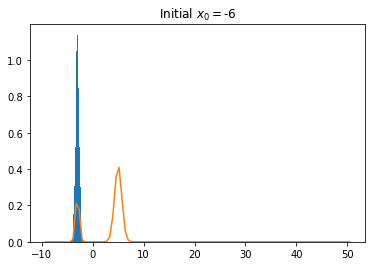

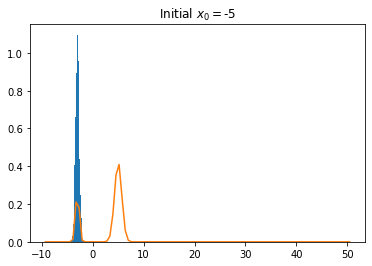

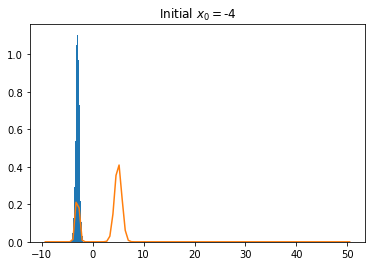

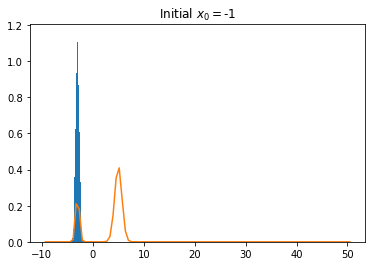

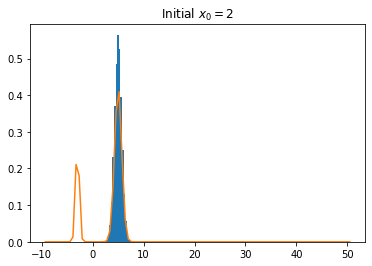

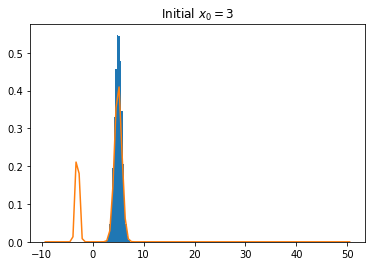

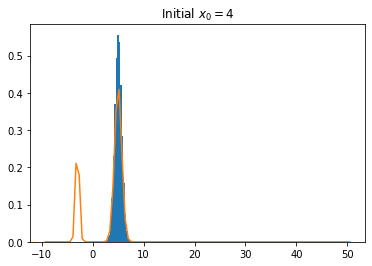

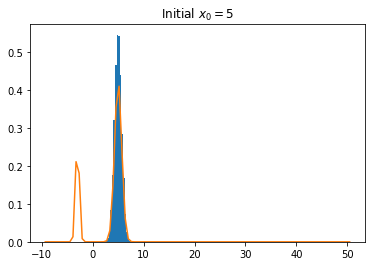

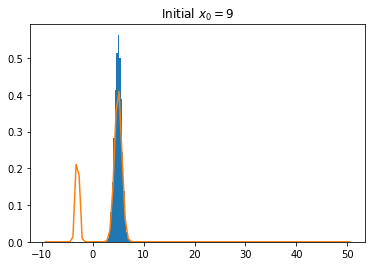

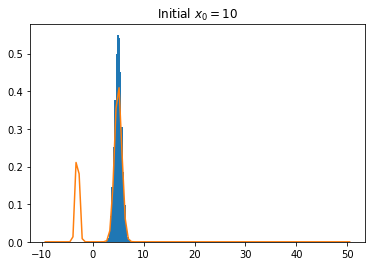

In [0]:
# Define f
f = lambda x : 4 * np.exp(-(x+3)**2 / 0.25) + 6 * np.exp(-(x-5)**2)

# Calculate Z, the normalizing factor
Z = quad(f,-np.inf,np.inf)[0]

for x in np.arange(-10,11):
  samples = metropolis_hastings_normal(f,1,x,10**5,10**5)
  plt.hist(samples,bins=20,density=True)
  d = np.linspace(min(s),max(s),100)
  plt.plot(d,f(d)/Z)
  plt.title("Initial $x_0 = $"+str(x))
  plt.show()

## 7.27

Given the old $f(x)$, initial value of $x_0=5$, plot the histogram after $B = 10^5, N = 10^5$

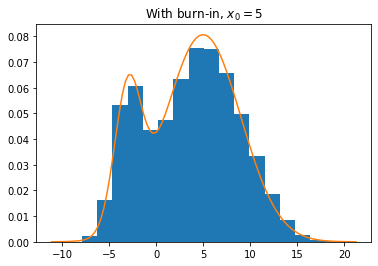

In [0]:
# Define f
f = lambda x : 4 * np.exp(-(x+3)**2 / 4) + 6 * np.exp(-(x-5)**2 / 32)

# Calculate Z, the normalizing factor
Z = quad(f,-np.inf,np.inf)[0]

samples = metropolis_hastings_normal(f, 1, 5, 10**5,10**5)

plt.hist(samples, bins=20, density=True)
d = np.linspace(min(samples),max(samples),100)
plt.plot(d,f(d)/Z)
plt.title("With burn-in, $x_0 = 5$")
plt.show()

## 7.28 

Prove that, using the proposal Markov chain in (7.10), for any proposal $s'$ the acceptance probability $a_{s',s}$ is always 1.

With the Markov chain defined as $q_{s',s} = \frac{1}{d}P(x_i' | x_1,...,\hat{x_i'},...,x_d)$, the acceptance probability $a_{s',s} = min(\frac{\pi_{s'}q_{ss'}}{\pi_sq_{s's}},1) = min(\frac{P(x_1,...,x_i,...,x_d)\frac{1}{d}P(x_i' | x_1,...,\hat{x_i'},...,x_d)}{P(x_1,...,x_i',...,x_d)\frac{1}{d}P(x_i | x_1,...,\hat{x_i},...,x_d)},1) = min(\frac{P(x_i)P(x_i')}{P(x_i')P(x_i)},1) = min(1,1) = 1$.


## 7.29

Consider the distribution with p.d.f. $f_{(X,Y)}(x,y) \propto e^{-(x^2y^2+x^2+y^2-8x-8y)/2}$

i.) Show that $f_{(X,Y)}(x,y) \propto g(y) e^{-(1+y^2)(x-\frac{4}{1+y^2})^2/2} $, and hence the conditional distribution $f_{X|Y}(x|y)$ is normal with mean $\frac{4}{1+y^2}$ and variance $\frac{1}{1+y^2}$. Since $f_{(X|Y)}(x,y)$ is symmetric in x and y, a similar result holds for $f_{(Y|X)}(y|x)$.

$e^{-(x^2y^2+x^2+y^2-8x-8y)/2} = e^{-(1+y^2)(x^2+\frac{y^2-8x-8y}{1+y^2})/2} = e^{-(1+y^2)(x^2+\frac{8x + 16}{1+y^2} + \frac{y^2-8y-16}{1+y^2})/2} = e^{-(1+y^2)(x^2+\frac{8x + 16}{1+y^2})/2}g(y) = g(y)e^{-(1+y^2)(x+\frac{4}{1+y^2})^2/2} \sim \mathcal{N}(\frac{4}{1+y^2},\frac{1}{1+y^2})$



ii.) Implement Gibbs sampler to sample from the joint distribution, starting at $(0,0)$, drawing $N=10^5$ times.


In [0]:
def normal_gibbs(x_0,N):
  x = np.empty((N,2))
  x[0] = x_0
  i = 0
  while i < N-1:
    x[i+1,0] = np.random.randn() / (1 + x[i,1]**2) + 4/(1+x[i,1]**2)
    x[i+1,1] = np.random.randn() / (1 + x[i+1,0]**2) + 4/(1+x[i+1,0]**2)
    i += 1

  return x


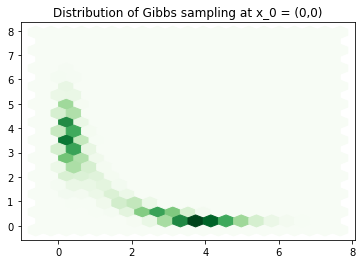

In [28]:
samples = normal_gibbs((0,0),10**5)
plt.hexbin(samples[:,0],samples[:,1],cmap="Greens",gridsize=20,)
plt.title("Distribution of Gibbs sampling at x_0 = (0,0)")
plt.show()